# **Decision Trees and Ensemble Learning**
## **1. Credit Risk Scoring Project**

The project for this week involves credit risk scoring. Imagine you want to buy a mobile phone, so you visit your bank to apply for a loan. You fill out an application form that requests various details, such as your income, the price of the phone, and the loan amount you need. The bank evaluates your application and assigns a score, ultimately deciding whether to approve or decline your request with a ‘yes’ or ‘no’ response.

In this chapter, our goal is to build a model that the bank can utilize to make informed decisions about lending money to customers. The bank can provide the model with customer information, and in return, the model will generate a risk score, indicating the likelihood of a customer defaulting on the loan. This risk score enables the bank to make well-informed lending decisions.

Our approach involves analyzing historical data from various customers and their loan applications. For each case, we have information about the requested loan amount and whether the customer successfully repaid the loan or defaulted.

For instance:
+ Customer A –> OK
+ Customer B –> OK
+ Customer C –> DEFAULT
+ Customer D –> DEFAULT
+ Customer E –> OK

This problem can be framed as binary classification, where ‘y’ represents the target variable, and it can take on two values: 0 (OK) or 1 (DEFAULT). Our objective is to train a model to predict, for each new customer, the probability that they will default:

g(xi) –> PROBABILITY OF DEFAULT

We have ‘X,’ which encompasses all the customer information, and the target variable ‘y,’ which indicates the default probability.

Dataset: You can find the dataset at this link. The ‘Status’ variable in the dataset denotes whether the customer defaulted or not.

## 2. **Data Cleaning and Preparation**
### Preparation Steps
In the first part, we focus on necessary preparation steps. This includes importing essential libraries, downloading the dataset, previewing the the CSV File, and performing an initial column format adaptation to ensure uniformity in our data.

### Data Transformation and Splitting
The second part is dedicated to re-encoding categorical variables and performing the train/validation/test split, a crucial step in preparing our data for modeling and evaluation.

#### Imports for this project
For this project, we’ll need to import several essential libraries that we’re already familiar with. These libraries provide the foundation for our data analysis and machine learning tasks. The necessary libraries include:

1. **Numpy:** NumPy is a fundamental library for numerical and array operations in Python.
2. **Pandas:** Pandas is used for data manipulation and analysis, allowing us to work with structured data efficiently.
3. **Scikit-Learn:** Scikit-Learn is a powerful machine learning library that provides a wide range of tools and algorithms for our classification task. This library we’ll import at a later point.
4. **Matplotlib:** Matplotlib is essential for data visualization, enabling us to create informative plots and charts.
5. **Seaborn:** Seaborn complements Matplotlib and simplifies the creation of aesthetically pleasing statistical visualizations.

By ensuring that we have these libraries at our disposal, we’ll be well-equipped to tackle the various tasks involved in our credit risk scoring project.

In [1]:
# !pip install seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Downloading the dataset
To begin our analysis, we must first obtain the dataset. We achieve this using the ‘wget’ command. The following console command, which starts with ‘!’, allows us to download the CSV file from the web. We access the data by referencing the URL stored in the ‘data’ variable.

In [3]:
# data = "https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv"
# !wget $data

#### Previewing the CSV File
Similarly to using the ‘wget’ console command, we can gain an initial overview of the CSV file by using the ‘head’ function. This function works with text files and provides a quick look at the file’s content, just as we’ve seen with Pandas dataframes.

In [4]:
# !head CreditScoring.csv

In [5]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Adapting Column Format
We’ve observed that some of the categorical variables, such as ‘status,’ ‘home,’ ‘marital,’ ‘records,’ and ‘job,’ are currently encoded as numerical values, which can be less intuitive. To make the data more understandable, we’ll convert these columns into text format.

As a first step, we’ll lowercase all the column names for consistency:

In [6]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


This change ensures uniformity in our data and improves readability.

In [7]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)
 
marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)
 
job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)
 
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
# Missing values
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


It’s apparent that ‘income,’ ‘assets,’ and ‘debt’ columns contain extremely large values (e.g., 99999999.0) as maximum values. To address this issue, we need to replace these outlier values. Let’s explore the replacement process.

In [11]:
df.income.max()
# Output: 99999999
 
df.income.replace(to_replace=99999999, value=np.nan)
 
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

We’ll address the outlier values in a loop for all three columns: ‘income,’ ‘assets,’ and ‘debt’.

In [12]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
 
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


While analyzing the ‘status’ column, we discovered a single record with the value ‘unk,’ representing a missing or unknown status. Since our focus is solely on ‘ok’ and ‘default’ values, we can safely remove this record from the dataframe.

In [13]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [14]:
df = df[df.status != 'unk'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


#### **Performing the train/validation/test split**
The final step in our data preparation is to split the dataset into training, validation, and test sets. We achieve this using the ‘train_test_split’ function from scikit-learn.

In [15]:
from sklearn.model_selection import train_test_split
 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

To predict a probability, we need to convert our target variable ‘status’ into a numerical format.

In [16]:
(df_train.status == 'default').astype('int')

0       1
1       1
2       0
3       1
4       0
       ..
2667    0
2668    0
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int64

To complete our data preparation, we need to assign target variables for the training, validation, and test sets. Additionally, to prevent accidental use of the target variable during training, we should remove it from ‘df_train,’ ‘df_val,’ and ‘df_test.’

In [17]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
 
del df_train['status']
del df_val['status']
del df_test['status']
 
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### **Introduction to Decision Trees**

Decision trees are powerful tools in the field of machine learning and data analysis. They are a versatile and interpretable way to make decisions and predictions based on a set of input features. Imagine a tree-like structure where each internal node represents a feature or attribute, each branch signifies a decision or outcome, and each leaf node provides a final prediction or classification.

Decision trees are widely used for tasks such as classification and regression. They are known for their simplicity and ease of interpretation, making them a valuable resource for understanding and solving complex problems. In this blog post, we’ll delve into the world of decision trees, exploring how they work, and how to build them.

### **How a decision tree looks like**

A **decision tree** is a data structure where we have a node which is the condition. And from this node there is one arrow to the left (condition = false) and one to the right (condition=true). Then there is the next condition which can be true or false. … until there is the final decision ‘OK’ or ‘DEFAULT’

In [18]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'         
 
# just take one record to test
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

When we look at the decision tree, what would be the result for this client? First condition is “RECORDS = YES.” Our client has no records, so we go to the left. The second condition is “ASSETS > 6000.” The assets of our client are 10,000, so we go to the right. Now we reach the decision node, which in this case is “OK.” Let’s use the implemented function shown in the previous snippet and compare the output.

In [19]:
assess_risk(xi)

'ok'

Indeed the output is also “OK”. We don’t want to always implement the whole rule set.These rules can be learned from the data using the decision tree algorithm.

#### **Training a decision tree**

Before we can train a decision tree, we first need to import necessary packages. From Scikit-Learn, we import DecisionTreeClassifier. Because we have categorical variables, we also need to import DictVectorizer as seen before.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

Now we need to turn our training dataframe into a list of dictionaries then turn this list of dictionaries into the feature matrix. After that we train the model.

In [21]:
# This will lead us later to an error
# train_dicts = df_train.to_dict(orient='records')
# ... so we use instead:
 
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

All the numerical features remain unchanged, but we have encoding for categorical features.

In [23]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

Let’s look back at the performance of our trained Decision Tree from part 1.

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
 
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
 
roc_auc_score(y_val, y_pred)

np.float64(0.6575373568089897)

#### **Overfitting**

**0.66** is not really a great value, let’s look at training data and calulate auc score.

In [25]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

This is called overfitting. **Overfitting** is when our model simply memorizes the data, but it memorizes in such a way that when it sees a new example it doesn’t know what to do with this example. So it memorizes the training data but it fails to generalize. The reason why this happens to decision trees is that the model creates a specific rule for each example. That works fine for training data, but it doesn’t work for any unseen example. The reason why this can happens is, that we let the tree grow too deep. If we restrict the tree to only grow up to three levels deep, the tree will learn rules that are less specific.

In [26]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)
# Output: train 0.7761016984958594
 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.7761016984958594
val 0.7389079944782155


#### **Decision Stump**
If we restrict the depth to 3, the model performance on validation is significantly better. It’s now 74% compared to 65%. By the way a decistion tree with a depth of 1 is called Decision Stump. It’s not really a tree, because this is only one condition.

In [27]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)
# Output: train 0.6282660131823559
 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.6282660131823559
val 0.6058644740984719


The auc score of this decision stump is only a bit worse than the overfitted one.

#### **Visualizing Decision Stump**
Let’s examine this tree to understand the rules it has learned. To do that, we can use a specialized function in Scikit-Learn for visualizing trees.

In [28]:
from sklearn.tree import export_text
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- class: 1
|--- feature_25 >  0.50
|   |--- class: 0



To understand the meaning of ‘feature_25,’ we need to consult the DictVectorizer feature names dictionary.

In [29]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- class: 1
|--- records=no >  0.50
|   |--- class: 0



This means that if there are no records (records=no <= 0.50), it’s labeled as ‘DEFAULT.’ If there are records (records=no > 0.50), it’s labeled as ‘OK.’ It’s important to note that one-hot encoding is applied here, and there is a column named ‘records=NO,’ which is encoded as 0 when it’s not ‘no’ and 1 when it’s ‘no’.

In [30]:
# Decision Tree with depth of 2
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)
# Output: train 0.7054989859726213
 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 0.7054989859726213
val 0.6685264343319367


Even two levels in a decision tree already performs better than the overfitted one.

In [31]:
# Visualizing Decision tree
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1



In [32]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



#### **Decision Tree Learning Algorithm**

Before we dive deeper into parameter tuning, which is the topic of (Decision Trees and Ensemble Learning), let’s take a step back for a moment and explore how a decision tree can generate rules, as we’ve seen in the last article.

In this article, we simplify the problem by using a much smaller dataset with just one feature. Additionally, we employ a very small tree, known as a “decision stump.” This approach offers a clearer understanding of how a decision tree learns from data.

So, let’s begin with a decision stump, which is essentially a decision tree with only one level. This means we have a condition node with the condition inside. Conditions are in the form of “feature > T”, where T represents a threshold. The condition “feature > T” is referred to as a “split”. This split divides the data into records that satisfy the condition (TRUE) and those that do not (FALSE). At the top of the tree, we have the condition node, and at the bottom, there are the leaves of the tree. These leaves are called decision nodes. Decision nodes are where the tree doesn’t go any deeper, and this is where decisions are made. In this context, “decision making” means that we choose the most frequently occurring status label within each group and use it as the final decision for that group.

FEATURE > T 

   /      \  
   
FALSE     TRUE

DEFAULT     OK

To illustrate how the learning algorithm works, let’s use a simple dataset. This dataset contains 8 records with one value for ‘assets’ and one for ‘status,’ which is our target variable.

In [33]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
 
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


**Finding the best split for one column**

What we want to do now is, we want to use this numerical column ‘assets’ in our training. We want to train a decision tree using this column. So we want to train a model based on the condition ASSETS > T The question is: What is the best T? So what is the best split? We want to split the dataset into two parts. One part where the condition holds true, and the other part where the condition does not hold true.

In [34]:
# ASSETS > T 
#    /      \                            
# FALSE     TRUE
# DF_LEFT     DF_RIGHT

DF_RIGHT is where this condition is true, so for all records where ‘assets’ is greater than T. DF_LEFT is where this condition is false, so for all records where ‘assets’ is not greater than T.

This is called **splitting**, so we’re splitting the data set into two parts where it’s true and where it’s false.

What we can do now is sorting the data by the ‘assets’ column.

In [35]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


We are considering different threshold values “T” for the condition “ASSETS > T.” The possibilities for the threshold “T” are:

+ T = 2000 (ASSETS<=2,000 becomes LEFT, ASSETS>2,000 becomes RIGHT)
+ T = 3000 (ASSETS<=3,000 becomes LEFT, ASSETS>3,000 becomes RIGHT)
+ T = 4000 (ASSETS<=4,000 becomes LEFT, ASSETS>4,000 becomes RIGHT)
+ T = 5000 (ASSETS<=5,000 becomes LEFT, ASSETS>5,000 becomes RIGHT)
+ T = 8000 (ASSETS<=8,000 becomes LEFT, ASSETS>8,000 becomes RIGHT)

It’s important to note that values like T = 9000 and T = 0 don’t make sense for splitting because there would be nothing on the right or left side, respectively.

In [36]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

We want to evaluate each of these threshold values “T” by splitting our dataset into the left (LEFT) and right (RIGHT) subsets and determine which split provides the best results.

In [37]:
from IPython.display import display
 
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
     
    display(df_left)
    display(df_right)
 
    print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


Now that we have generated many splits using different threshold values, we need to determine which split is the best. To evaluate this, we can use various split evaluation criteria. Let’s take the example where T=4000. In this case, on the LEFT side, we have 3 cases labeled as DEFAULT and 1 case labeled as OK. On the RIGHT side, we have 3 cases labeled as OK and 1 case labeled as DEFAULT. As mentioned earlier, we select the most frequently occurring status within each group and use it as the final decision. In the case of the LEFT group, the most frequent status is “default,” and for the RIGHT group, it’s “ok.”

In [38]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]
 
display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


In [39]:
# ASSETS > 4000 
#    /      \                            
# FALSE     TRUE
# DEFAULT     OK 

**Misclassification Rate**

To evaluate the accuracy of our predictions, we can calculate the misclassification rate. The misclassification rate measures the fraction of errors when we predict that everyone in the LEFT group is a DEFAULT, and similarly for the RIGHT group. It gives us insight into how well our model is performing.

For the LEFT group (3xDEFAULT, 1xOK), where we predict everything as DEFAULT, the misclassification rate is 1/4, which equals 25%.

For the RIGHT group (3xOK, 1xDEFAULT), where we predict everything as OK, the misclassification rate is also 1/4, or 25%.

This is how we evaluate the quality of our split. For T=4000, the average misclassification rate is 25%. We can also use a weighted average, which is particularly useful when there are significantly more examples on one side than on the other. You can print the normalized value counts as shown in the next snippet.

In [40]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]
 
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


Let’s print out the average misclassification rate for each split. You can use the code implemented in the snippet below to calculate and display this information.

In [41]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
     
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
 
    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



##### **Impurity**

The misclassification rate is just one way of measuring **impurity**. We aim for our leaves to be as pure as possible, meaning that the groups resulting from the split should ideally contain only observations of one class, making them pure. The misclassification rate informs us of how impure these groups are by quantifying the error rate in classifying observations.

There are also alternative methods to measure impurity. Scikit-Learn offers more advanced criteria for splitting, such as entropy and Gini impurity. These criteria provide different ways to evaluate the quality of splits, with the goal of creating decision trees with more homogeneous leaves.

We observe that the split with T = 3000 yields the lowest average misclassification rate, resulting in the best impurity of 10%. This is how we determine the best split when dealing with just one column. To summarize our approach:

+ We sort the dataset.
+ We identify all possible thresholds.
+ For each of the thresholds, we split the dataset.
+ For each split, we calculate the impurity on the left and the right.
+ We then compute the average impurity.
+ Among all the splits considered, we select the one with the lowest average impurity.
  
The decision tree we’ve learned based on this split is as follows:

In [42]:
# ASSETS > 3000 
#    /      \                            
# FALSE     TRUE
# DEFAULT     OK

#### **Finding the best split for two columns**

In the last article, we began with a simple example that involved just one feature. Now, let’s explore what happens when we introduce another feature, ‘debt.’ This feature represents the amount of debt that clients have.

In [43]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]
 
df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


We’ve previously attempted splitting the data based on the ‘assets’ feature. Now, let’s investigate the results of attempting a split based on the ‘debt’ feature. To do this, we should first sort the data by the ‘debt’ column.

In [44]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


Possible thresholds:

+ T = 500 (DEBT<=500 becomes LEFT, DEBT>500 becomes RIGHT)
+ T = 1000 (DEBT<=1,000 becomes LEFT, DEBT>1,000 becomes RIGHT)
+ T = 2000 (DEBT<=2,000 becomes LEFT, DEBT>2,000 becomes RIGHT)

So we’ve seen how it works for only one feature. Let’s generalize a bit and put both threshold variables in a dictionary. If there are more features, we can put them here as well.

In [45]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}
 
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
 
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
 
        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


We can observe that the “debt” feature is not as useful for making the split as the “assets” feature. The best split overall remains the same as before: “ASSETS > 3000.” If we were working with three features, we would have another group in the table with another set of rows and another variable to consider.

##### **Finding the best split algorithm for multiple features**

In [46]:
# FOR each feature in FEATURES:
#     FIND all thresholds for the feature
#     FOR each threshold in thresholds:
#         SPLIT the dataset using "feature > threshold" condition
#         COMPUTE the impurity of this split
# SELECT the condition with the LOWEST IMPURITY

We may need to establish some stopping criteria. This is because we apply recursive splitting, but how do we determine when to stop?

### **Stopping Criteria**
To determine when to halt the recursive splitting process, it is essential to define stopping criteria. These criteria are vital for preventing overfitting and ensuring that the tree-building process concludes when specific conditions are satisfied. In the next article, when we discuss parameter tuning, we will delve into common stopping criteria for decision trees. Selecting the right stopping criteria is crucial as it depends on the dataset and the problem we are addressing. By adhering to these criteria, we can achieve a balance between model complexity and generalization. These criteria can be integrated into the decision tree algorithm to determine when to cease recursive splitting.

The most common stopping criteria are:

1. The group is already pure:
If a node is pure, meaning all samples in that node belong to the same class, further splitting is unnecessary as it won’t provide any additional information.

2. The tree reached depth limit (controlled by max_depth):
Limiting the depth of the tree helps control overfitting and ensures that the tree doesn’t become too complex.

3. The group is too small for further splitting (controlled by min_samples_leaf):
Restricting splitting when the number of samples in a node falls below a certain threshold helps prevent overfitting and results in smaller, more interpretable trees.


When we use these criteria, we enforce simplicity in our model, thereby preventing overfitting. Let’s summarize the decision tree learning algorithm.

#### **Decision Tree Learning Algorithm**

1. Find the Best Split:
For each feature evaluate all splits based on all possible thresholds and select this one that has the lowest impurity.
2. Stop if Max Depth is Reached:
Stop the splitting process if the maximum allowable depth of the tree is reached.
3. If LEFT is Sufficiently Large and Not Pure Repeat for LEFT:
If the left subset of data is both sufficiently large and not pure (contains more than one class), repeat the splitting process for the left subset.
4. If RIGHT is Sufficiently Large and Not Pure Repeat for RIGHT:
Similarly, if the right subset of data is both sufficiently large and not pure, repeat the splitting process for the right subset.

For more information on decision trees, you can visit the **scikit-learn website**. In the ‘Classification criteria’ section, you’ll find various methods for measuring impurity, including ‘Misclassification,’ as well as others like ‘Entropy’ and ‘Gini.’ It’s important to note that decision trees can also be employed to address regression problems.

## **Decision trees parameter tuning**

Part 8 of the ‘Decision Trees and Ensemble Learning’ section is dedicated to tuning decision tree parameters. Parameter tuning involves selecting the best parameters for training. In this context, ‘tuning’ means choosing parameters in a way that maximizes or minimizes a chosen performance metric (such as AUC or RMSE) on the validation set. In the case of AUC, our goal is to maximize it on the validation set by finding the parameter values that yield the highest score.

Let’s take a closer look at the parameters available for the DecisionTreeClassifier. For a more comprehensive list of parameters, you can refer to the official website. Some of the key parameters include:

+ criterion: This parameter determines the impurity measure used for splitting. You can choose between ‘gini’ for Gini impurity and ‘entropy’ for information gain. The choice of criterion can significantly impact the quality of the splits in the decision tree.
+ max_depth: This parameter controls the maximum depth of the decision tree. It plays a crucial role in preventing overfitting by limiting the complexity of the tree. Selecting an appropriate value for max_depth helps strike a balance between model simplicity and complexity.
+ min_samples_leaf: This parameter specifies the minimum number of samples required in a leaf node. It influences the granularity of the splits. Smaller values can result in finer splits and a more complex tree, while larger values lead to coarser splits and a simpler tree.
By carefully tuning these parameters, you can find the right configuration that optimizes your model’s performance, ensuring it’s well-suited for your specific machine learning task.

#### **Selecting max_depth**
To start the parameter tuning process, our initial focus will be on the ‘max_depth‘ parameter. Our goal is to identify the optimal ‘max_depth‘ value before proceeding to fine-tune other parameters. ‘max_depth‘ governs the maximum depth of the decision tree. When set to ‘None,’ it imposes no restrictions, allowing the tree to grow as deeply as possible, potentially resulting in numerous layers.

We will conduct experiments using various values for ‘max_depth,’ including the ‘None’ setting, which serves as a baseline for comparison and enables us to understand the consequences of not constraining the tree’s depth.

In [47]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.757
  10 -> 0.698
  15 -> 0.663
  20 -> 0.651
None -> 0.648


What we can observe here is that the optimal values appear to be around 76% for ‘max_depth’ values of 4, 5, and 6. This indicates that our best-performing tree should have between 4 to 6 layers. If there were no other parameters to consider, we could choose a depth of 4 to make the tree simpler, with only 4 layers instead of 5. A simpler tree is generally easier to read and understand, making it more transparent in terms of what’s happening.

#### **Selecting min_samples_leaf**
But ‘max_depth‘ is not the only parameter; there is another one called ‘min_samples_leaf.’ We have already determined that the optimal depth falls between 4 and 6. For each of these values, we can experiment with different ‘min_samples_leaf‘ values to observe their effects.

In [48]:
scores = []
 
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.661827
1,4,2,0.697495
2,4,5,0.715565
3,4,10,0.763977
4,4,15,0.785816


In [49]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
13,5,15,0.788147
22,6,15,0.788114
4,4,15,0.785816
23,6,20,0.785120
14,5,20,0.782873


This information can be presented differently by transforming it into a DataFrame. In this DataFrame, ‘min_samples_leaf‘ will be on the rows, ‘max_depth‘ will be on the columns, and the cell values will represent the ‘auc‘ scores. To achieve this, we can utilize the ‘pivot’ function. This tabular format is more user-friendly, and it’s evident that 0.787 is the highest value.

In [50]:
# index - rows
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.662  0.669  0.661
2                 0.697  0.691  0.688
5                 0.716  0.708  0.724
10                0.764  0.762  0.761
15                0.786  0.788  0.788
20                0.782  0.783  0.785
100               0.780  0.779  0.779
200               0.768  0.768  0.768
500               0.680  0.680  0.680

Another visualization option is to create a heatmap.

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

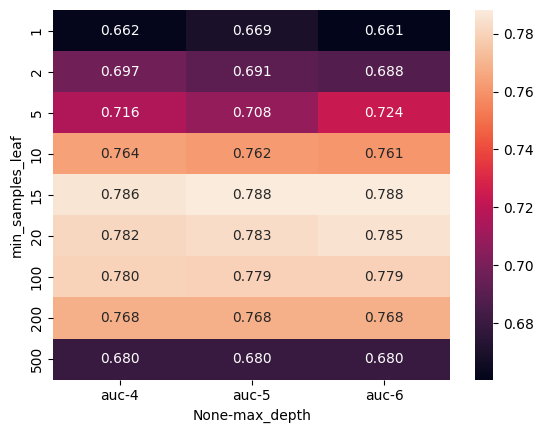

In [51]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In this heatmap, it’s easy to identify the highest value as it appears the lightest, while the darkest shade represents the lowest or poorest value. However, it’s important to note that this method of selecting the best parameter might not always be optimal. There’s a possibility that a ‘max_depth’ of 7, 10, or another value works better, but we haven’t explored those possibilities. This is because we initially tuned the ‘max_depth’ parameter and then selected the best ‘min_samples_leaf.’ For small datasets, it’s feasible to try a variety of values, but with larger datasets, we need to constrain our search space to be more efficient. Therefore, it’s often a good practice to first optimize the ‘max_depth’ parameter and then fine-tune the other parameters.

Nevertheless, given the small size of this dataset, training is fast, allowing us to experiment with different combinations. Let’s explore a few more combinations.

In [52]:
scores = []
 
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
 
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
67,NaN,15,0.789131
4,4.0,15,0.787729
31,7.0,15,0.787345
22,6.0,15,0.787190
49,15.0,15,0.786972


The preceding table demonstrates that the AUC scores of the top five options are quite close. Interestingly, in each of these top five cases, ‘min_samples_leaf‘ is set to 15. Let’s explore alternative visualizations for deeper insights.

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

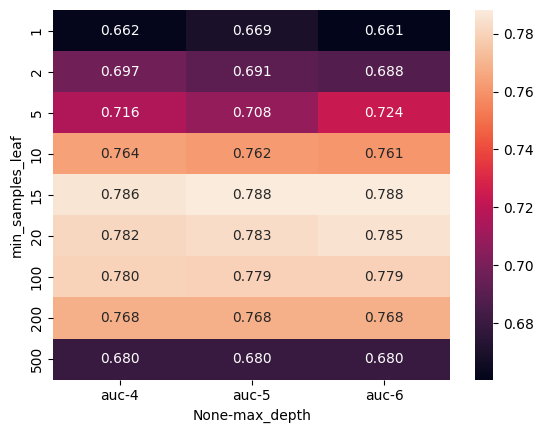

In [53]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In the last snippet, we train our DecisionTreeClassifier with the final tuned parameters: ‘max_depth‘ set to 6 and ‘min_samples_leaf‘ set to 15.

In [54]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### **Ensemble and random forest**

This article discusses the concept of Random Forest as a technique for combining multiple decision trees. Before diving into Random Forest, we’ll explore the concept of ensemble modeling, where multiple models act as a ‘board of experts.’ The final part of the article will cover the process of tuning a Random Forest model.

### Board of experts
So far, we’ve been discussing the process when a client approaches a bank for a loan. They submit an application with basic information, and features are extracted from this application. These features are then fed into a decision tree, which provides a score representing the probability of the customer defaulting on the loan. Based on this score, the bank makes a lending decision.

Now, let’s imagine an alternative scenario where we don’t use a decision tree but rather rely on a ‘board of experts,’ consisting of five experts. When a customer submits an application, it’s distributed to each of these experts. Each expert independently evaluates the application and decides whether to approve or reject it. The final decision is determined by a majority vote—if the majority of experts say ‘yes,’ the bank approves the loan; if the majority says ‘no,’ the application is rejected.

The underlying concept of the ‘board of experts’ is based on the belief that the collective wisdom of five experts is more reliable than relying solely on one expert’s judgment. By aggregating multiple expert opinions, we aim to make better decisions.

This same concept can be applied to models. Instead of a ‘board of five experts,’ we can have five models (g1, g2, …, g5), each of which returns a probability of default. We can then aggregate these model predictions by calculating the average: (1/n) * Σ(pi).

### Ensembling models
This method of aggregating multiple models is applicable to any type of model. However, in this case, we specifically focus on using decision trees. When we ensemble decision trees, we create what is known as a ‘random forest.’

But you might wonder, why do we call it a ‘random forest’ and not just a ‘forest’? The reason is that if we take the same application (with the same set of features) and build the same group of trees with identical parameters, the resulting trees would also be identical. These identical trees would produce exactly the same probability of default, and therefore, the average would be the same as well. Essentially, we would be training the same model five times, which is not what we want.

To avoid this redundancy and bring the ‘random’ element into play, a ‘random forest’ introduces variability during the training process by using bootstrapped samples and random subsets of features, leading to a more diverse and robust ensemble of decision trees.

### Random forest – ensembling decision trees
So, what exactly happens in a random forest?

In a random forest, each of the applications or features that the trees receive is slightly different. For instance, if we have a total of 10 features, each tree might receive 7 out of the 10 features, creating a distinct set for each tree.

To illustrate this with a smaller example, let’s consider 3 features: assets, debt, and price. If we train only 3 models, we might have the following feature sets for each:

+ Decision Tree #1: Features – assets, debt
+ Decision Tree #2: Features – assets, price
+ Decision Tree #3: Features – debt, price
  
This way, we have 3 different models. To obtain the final prediction, we calculate the average score as (1/3) * (p1 + p2 + p3). While in this simplified example, the feature selection is not entirely random due to the limited number of features, the real idea is to select features randomly from a larger set.

In a random forest, each model gets a random subset of features, and the response generated by the ensemble will be a probability of default. This is the fundamental concept behind a random forest. To use it in scikit-learn, you need to import it from the ensemble package.

In [55]:
from sklearn.ensemble import RandomForestClassifier
 
# n_estimators - number of models we want to use
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
 
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# Output: 0.781835024581628
 
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

This model achieves an AUC score of 78.2%, which is relatively good. Notably, this performance is on par with the best decision tree model without any specific tuning. In this instance, we used the default hyperparameters and only reduced the ‘n_estimators’ value from the default of 100 to 10.

However, it’s important to recognize that a random forest introduces an element of randomness during training. Consequently, when we retrain the model and make predictions again, we may obtain slightly different results due to this randomization. To ensure consistent and reproducible results, we can use the ‘random_state’ parameter. By setting a fixed ‘random_state,’ regardless of how many times we run the model, the results will remain the same.

In [56]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
 
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# Output: 0.7744726453706618
 
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

#### **Tuning random forest**
Let’s delve into the possibilities of fine-tuning our random forest model. To start, we’ll explore how the model’s performance evolves when we increase the number of estimators or models it employs. Our approach will involve iterating over a range of values to observe how the model’s performance improves or changes with an increasing number of trees.

In [57]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    scores.append((n, auc))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


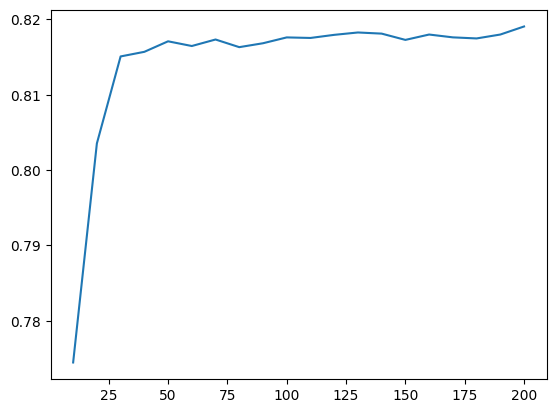

In [58]:
# x-axis - n_estimators
# y-axis - auc score
plt.plot(df_scores.n_estimators, df_scores.auc)

We observe that the model’s performance improves as we increase the number of estimators up to 50, but beyond that point, it reaches a plateau. Additional trees don’t significantly enhance the performance. Hence, training more than 50 trees doesn’t appear to be beneficial.

Now, let’s proceed with tuning our random forest model. It’s important to note that a random forest comprises multiple decision trees, so the parameters we tune within the random forest are essentially the same—specifically, we are interested in the max_depth and min_samples_leaf parameters. Starting with the max_dept‘ parameter, we aim to train a random forest model with different depth values to assess its impact on performance.

In [59]:
scores = []
 
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((d, n, auc))
 
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


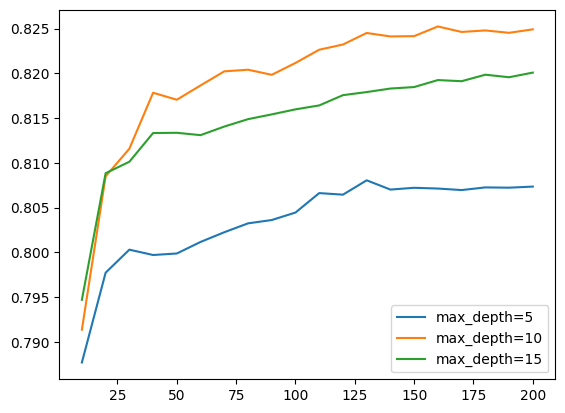

In [60]:
# Let's plot it
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
 
plt.legend()

In the plot, we can observe that the AUC scores for ‘max_depth’ values of 10 and 15 are initially quite close, but after a certain point, the score for ‘max_depth‘ 15 begins to level off, showing only marginal improvement. In contrast, ‘max_depth‘ 10 continues to perform significantly better, peaking at around 125. This clearly illustrates that the choice of ‘max_depth‘ indeed matters. We can confidently select a value of 10 as the best choice, as the difference between 10 and 15, and between 10 and 5, is notably significant.

In [61]:
# Let's select 10 as the best value
max_depth = 10

Now, we’ll proceed to find the optimal value for the ‘min_samples_leaf’ parameter using a similar method as before

In [62]:
scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((s, n, auc))
 
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

For a better distinction between the graphs in the following plot we can change the colors as you see in the next two snippets.

In [63]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

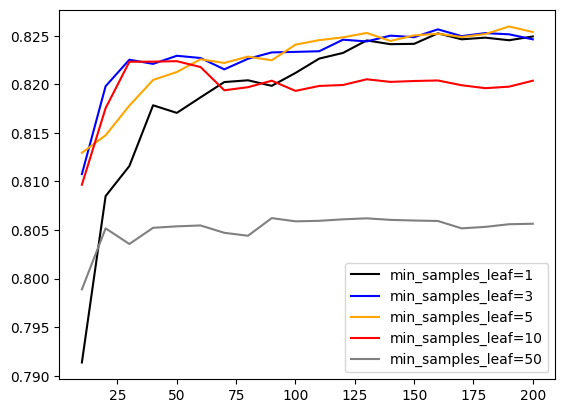

In [64]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()

We can observe that ‘min_samples_leaf’ set to 50 performs the worst, while the three most favorable options are 1, 3, and 5. Among these, ‘min_samples_leaf’ of 3 stands out a good choice since it achieves good performance earlier than the others.

In [65]:
# Let's select 3 as the best value
min_samples_leaf = 3

Now, we’re ready to retrain the model using these selected values.

In [66]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

These are not the only two parameters we can tune in a random forest model. There are several other useful parameters to consider:

+ **max_features**: This parameter determines how many features each decision tree receives during training. It’s essential to remember that random forests work by selecting only a subset of features for each tree.
+ **bootstrap**: Bootstrap introduces another form of randomization, but at the row level. This randomization ensures that the decision trees are as diverse as possible.
+ **n_jobs**: The training of decision trees can be parallelized because all the models are independent of each other. The ‘n_jobs’ parameter specifies how many trees can be trained in parallel. The default is ‘None,’ which means no parallelization. Using ‘-1’ means utilizing all available processors, which can significantly speed up the training process.”

These additional parameters offer opportunities for further fine-tuning and customization of your random forest model. For additional details and documentation on these parameters, you can refer to the official Scikit-Learn website.

### **Gradient boosting and XGBoost**
This time, we delve into a different approach for combining decision trees, where models are trained sequentially, with each new model correcting the errors of the previous one. This method of model combination is known as boosting. We will specifically explore gradient boosting and utilize the XGBoost library, which is designed for implementing the gradient boosted tree algorithm.

#### **Gradient boosting vs. random forest**
In a random forest, multiple independent decision trees are trained on the same dataset. The final prediction is achieved by aggregating the results of these individual trees, typically by taking an average: ((1/n) * Σ(pi)).

On the other hand, boosting employs a different strategy for combining multiple models into one ensemble. In boosting, we begin with the dataset and train the first model. The first model makes predictions, and we evaluate the errors made. Based on these errors, we train a second model, which generates its own predictions and, in the process, introduces its own errors. We then train a third model, which aims to correct the errors made by the second model. This process can be repeated for multiple iterations. At the end of these iterations, we combine the predictions from these multiple models into the final prediction.

The core idea behind boosting is the sequential training of multiple models, where each subsequent model corrects the mistakes of the previous one.

##### **Installing XGBoost**
XGBoost is a library known for its highly effective implementation of gradient boosting.

In [67]:
# !pip install xgboost
 
import xgboost as xgb

#### **Training the first model**
The first step in the process is to structure the training data into a specialized data format known as ‘DMatrix.’ This format is optimized for training XGBoost models, allowing for faster training.

XGBoost Parameters – Some of the most crucial parameters include:

+ **eta:** This parameter represents the learning rate, determining how quickly the model learns.
+ **max_depth:** Similar to random forests and decision trees, ‘max_depth’ controls the size of the trees.
+ **min_child_weight:** This parameter controls the minimum number of observations that should be present in a leaf node, similar to the ‘min_samples_leaf’ in decision trees.
+ **objective:** Since we have a binary classification task, where we aim to classify clients into ‘defaulting’ or ‘non-defaulting,’ we need to specify the ‘objective.’ There are various objectives available for different types of problems, including regression and classification.
+ **nthread:** XGBoost has the capability to parallelize training, and here, we specify how many threads to utilize.
+ **seed:** This parameter controls the randomization used in the model.
+ **verbosity:** It allows us to control the level of detail in the warnings and messages generated during training.

In [68]:
# structuring the training data into a specialized data format known as ‘DMatrix.’
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [69]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'nthread': 8,
     
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round= 10)

Now, we’re ready to test the model. To do this, we can simply use the predict function of the XGBoost model. It returns a one-dimensional array with the model’s predictions.

In [70]:
y_pred = model.predict(dval)

We can proceed to calculate the AUC and observe that this model achieves a value of nearly 81%. This is a commendable performance, considering that we haven’t performed any specific parameter tuning; we’ve used the default settings. However, it’s essential to exercise caution regarding the number of trees we train and the tree sizes, as XGBoost models can also be prone to overfitting, a topic we’ll explore in more depth later on. Notably, in this case, the performance with num_boost_round=10 is quite comparable to num_boost_round=200.

In [71]:
roc_auc_score(y_val, y_pred)

np.float64(0.8065256351262986)

#### **Performance Monitoring**
In XGBoost, it’s feasible to monitor the performance of the training process, allowing us to closely observe each stage of the training procedure. To achieve this, after each iteration where a new tree is trained, we can promptly evaluate its performance on our validation data to assess the results. For this purpose, we can establish a watchlist that comprises the datasets we intend to use for evaluation.

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

By default, XGBoost displays the error rate (logloss), a metric commonly used for parameter tuning. However, given the technical nature of this metric, we’ll opt for another more accessible metric for our analysis.

In [73]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-logloss:0.49703	val-logloss:0.54305
[1]	train-logloss:0.44463	val-logloss:0.51462
[2]	train-logloss:0.40707	val-logloss:0.49896
[3]	train-logloss:0.37760	val-logloss:0.48654
[4]	train-logloss:0.35990	val-logloss:0.48007
[5]	train-logloss:0.33931	val-logloss:0.47563
[6]	train-logloss:0.32586	val-logloss:0.47413
[7]	train-logloss:0.31409	val-logloss:0.47702
[8]	train-logloss:0.29962	val-logloss:0.48205
[9]	train-logloss:0.29216	val-logloss:0.47996
[10]	train-logloss:0.28407	val-logloss:0.47969
[11]	train-logloss:0.27583	val-logloss:0.47888
[12]	train-logloss:0.27127	val-logloss:0.47697
[13]	train-logloss:0.26525	val-logloss:0.47871
[14]	train-logloss:0.25734	val-logloss:0.48096
[15]	train-logloss:0.25186	val-logloss:0.48160
[16]	train-logloss:0.24849	val-logloss:0.47982
[17]	train-logloss:0.24144	val-logloss:0.48086
[18]	train-logloss:0.23796	val-logloss:0.47978
[19]	train-logloss:0.23390	val-logloss:0.47857
[20]	train-logloss:0.22833	val-logloss:0.48036
[21]	train-logloss:0.22

For our monitoring purposes, we choose to use AUC as the metric, which we’ve previously employed. To do this, we set the eval_metric parameter to auc.

In [74]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90699	val-auc:0.79010
[3]	train-auc:0.91677	val-auc:0.79967
[4]	train-auc:0.92246	val-auc:0.80443
[5]	train-auc:0.93086	val-auc:0.80858
[6]	train-auc:0.93675	val-auc:0.80981
[7]	train-auc:0.94108	val-auc:0.80872
[8]	train-auc:0.94809	val-auc:0.80456
[9]	train-auc:0.95100	val-auc:0.80653
[10]	train-auc:0.95447	val-auc:0.80851
[11]	train-auc:0.95672	val-auc:0.81052
[12]	train-auc:0.95818	val-auc:0.81389
[13]	train-auc:0.96071	val-auc:0.81270
[14]	train-auc:0.96333	val-auc:0.81265
[15]	train-auc:0.96554	val-auc:0.81334
[16]	train-auc:0.96669	val-auc:0.81510
[17]	train-auc:0.96951	val-auc:0.81573
[18]	train-auc:0.97113	val-auc:0.81667
[19]	train-auc:0.97261	val-auc:0.81811
[20]	train-auc:0.97464	val-auc:0.81729
[21]	train-auc:0.97560	val-auc:0.81780
[22]	train-auc:0.97653	val-auc:0.81656
[23]	train-auc:0.97773	val-auc:0.81636
[24]	train-auc:0.97809	val-auc:0.81613
[25]	train-auc:0.97953	val-auc:0.81

#### **Parsing xgboost’s monitoring output**
When you’re interested in visualizing this information on a plot, one of the challenges with XGBoost is that it doesn’t provide an easy way to extract this information since it’s printed to standard output. However, in Jupyter Notebook, there’s a method to capture whatever is printed to standard output and manipulate it. You can use the command %%capture output to achieve this. It captures all the content that the code outputs into a special object, which you can then use to extract the information. It’s worth noting that although something is happening in the code, we won’t see any output because it’s being captured.

In [75]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:
s = output.stdout
 
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

Now that we have the captured output in a string, the first step is to split it into individual lines by using the new line operator \n. The result is a string for each line of the output.

In [77]:
s.split('\n')

['[0]\ttrain-auc:0.86730\tval-auc:0.77938',
 '[5]\ttrain-auc:0.93086\tval-auc:0.80858',
 '[10]\ttrain-auc:0.95447\tval-auc:0.80851',
 '[15]\ttrain-auc:0.96554\tval-auc:0.81334',
 '[20]\ttrain-auc:0.97464\tval-auc:0.81729',
 '[25]\ttrain-auc:0.97953\tval-auc:0.81686',
 '[30]\ttrain-auc:0.98579\tval-auc:0.81543',
 '[35]\ttrain-auc:0.99011\tval-auc:0.81206',
 '[40]\ttrain-auc:0.99421\tval-auc:0.80922',
 '[45]\ttrain-auc:0.99548\tval-auc:0.80842',
 '[50]\ttrain-auc:0.99653\tval-auc:0.80918',
 '[55]\ttrain-auc:0.99765\tval-auc:0.81114',
 '[60]\ttrain-auc:0.99817\tval-auc:0.81172',
 '[65]\ttrain-auc:0.99887\tval-auc:0.80798',
 '[70]\ttrain-auc:0.99934\tval-auc:0.80870',
 '[75]\ttrain-auc:0.99965\tval-auc:0.80555',
 '[80]\ttrain-auc:0.99979\tval-auc:0.80549',
 '[85]\ttrain-auc:0.99988\tval-auc:0.80374',
 '[90]\ttrain-auc:0.99993\tval-auc:0.80409',
 '[95]\ttrain-auc:0.99996\tval-auc:0.80548',
 '[100]\ttrain-auc:0.99998\tval-auc:0.80509',
 '[105]\ttrain-auc:0.99999\tval-auc:0.80629',
 '[110]\tt

Each line consists of three components: the number of iterations, the evaluation on the training dataset, and the evaluation on the validation dataset. We can split these components using the tabulator operator \t, resulting in three separate components. To ensure the correct format (integer, float, float), we utilize the strip method and perform the necessary string-to-integer and string-to-float conversions. The following snippet demonstrates these steps.

In [78]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86730\tval-auc:0.77938'

In [79]:
line.split('\t')

['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

In [80]:
num_iter, train_auc, val_auc = line.split('\t')
num_iter, train_auc, val_auc

('[0]', 'train-auc:0.86730', 'val-auc:0.77938')

In [81]:
int(num_iter.strip('[]'))

0

In [82]:
float(train_auc.split(':')[1])

0.8673

In [83]:
float(val_auc.split(':')[1])

0.77938

We can combine all these steps to transform the information (number of iterations, AUC on the training data, and AUC on the validation data) from the output into a dataframe. The following snippet encapsulates all these steps within a single function for ease of use. This allows us to plot the data and perform further analysis.

In [84]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

Now, let’s see how the function works in action.

In [85]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


The result of the parse_xgb_output function is a dataframe, enabling us to utilize the plot function for graph visualization.

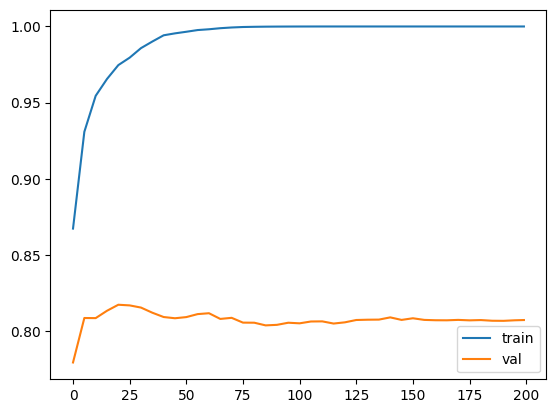

In [86]:
# x-axis - number of iterations
# y-axis - auc
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

We can observe that the AUC on the training dataset consistently improves. However, the picture is different for the validation dataset. The curve reaches its peak earlier and then starts to decline and stagnate, indicating the onset of overfitting. This decline in performance on the validation dataset is more apparent when plotting only the AUC on validation, while the AUC on the training dataset remains consistently high. The decline in performance is more evident when we exclusively plot the validation graph.

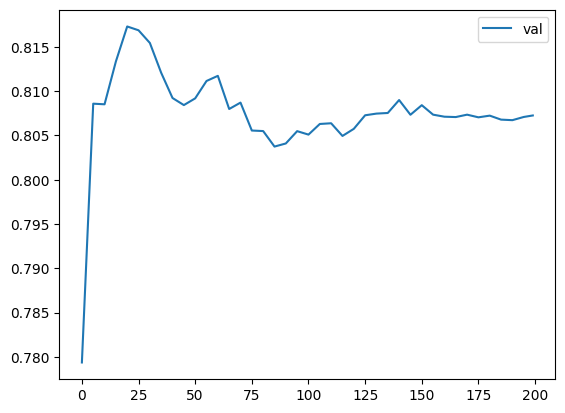

In [87]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

### **XGBoost parameter tuning**

This part is about **XGBoost** parameter tuning. It’s the first part of a two-part series, where we begin by tuning the initial parameter – ‘eta‘. The subsequent article will explore parameter tuning for ‘max_depth‘ and ‘min_child_weight‘. In the final phase, we’ll train the final model. Let’s start tuning the first parameter.

#### **Tuning Eta**
Eta, also known as the learning rate, determines the influence of the following model when correcting the results of the previous model. If the weight is set to 1.0, all new predictions are used to correct the previous ones. However, when the weight is 0.3, only 30% of the new predictions are considered. In essence, eta governs the size of the steps taken during the learning process.

Now, let’s explore how different values of eta impact model performance. To facilitate this, we’ll create a dictionary called ‘scores‘ to store the performance scores for each value of eta.

**Eta = 0.3**

In [88]:
scores = {}

In [89]:
%%capture output
 
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

We aim to structure keys in the format ‘eta=0.3’ to serve as identifiers in the scores dictionary.

In [90]:
'eta=%s' % (xgb_params['eta'])

'eta=0.3'

In the next snippet, we once again employ the ‘parse_xgb_output‘ function, which we defined in the previous article. This function returns a dataframe that contains train_auc and val_auc values for different num_iter.

In [91]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

Now the dictionary scores contains the dataframe for this eta.

In [92]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86730  0.77938
 1          5    0.93086  0.80858
 2         10    0.95447  0.80851
 3         15    0.96554  0.81334
 4         20    0.97464  0.81729
 5         25    0.97953  0.81686
 6         30    0.98579  0.81543
 7         35    0.99011  0.81206
 8         40    0.99421  0.80922
 9         45    0.99548  0.80842
 10        50    0.99653  0.80918
 11        55    0.99765  0.81114
 12        60    0.99817  0.81172
 13        65    0.99887  0.80798
 14        70    0.99934  0.80870
 15        75    0.99965  0.80555
 16        80    0.99979  0.80549
 17        85    0.99988  0.80374
 18        90    0.99993  0.80409
 19        95    0.99996  0.80548
 20       100    0.99998  0.80509
 21       105    0.99999  0.80629
 22       110    1.00000  0.80637
 23       115    1.00000  0.80494
 24       120    1.00000  0.80574
 25       125    1.00000  0.80727
 26       130    1.00000  0.80746
 27       135    1.00000  0.80753
 28

In [93]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729
5,25,0.97953,0.81686
6,30,0.98579,0.81543
7,35,0.99011,0.81206
8,40,0.99421,0.80922
9,45,0.99548,0.80842


**Eta = 1.0**

Now, let’s set the eta value to its maximum, which is 1.0.

In [94]:
%%capture output
 
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [95]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

With the updated eta value, the scores dictionary should now encompass two values and two corresponding keys.

In [96]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.95857,0.79136
2,10,0.98061,0.78355
3,15,0.99549,0.78050
4,20,0.99894,0.78591
5,25,0.99989,0.78401
6,30,1.00000,0.78371
7,35,1.00000,0.78234
8,40,1.00000,0.78184
9,45,1.00000,0.77963


**Eta = 0.1**

Let’s go through the process once more for ‘eta=0.1’ and subsequently print out the dataframe.

In [97]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [99]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.90325,0.79290
2,10,0.91874,0.80510
3,15,0.93126,0.81380
4,20,0.93873,0.81804
5,25,0.94638,0.82065
6,30,0.95338,0.82063
7,35,0.95874,0.82404
8,40,0.96325,0.82644
9,45,0.96694,0.82602


**Eta = 0.05**

Let’s do it again for ‘eta=0.05’ and print out the dataframe.

In [100]:
%%capture output
 
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [101]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
 
# Output: 'eta=0.05'

'eta=0.05'

In [102]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.88650,0.79584
2,10,0.90368,0.79623
3,15,0.91072,0.79938
4,20,0.91774,0.80510
5,25,0.92385,0.80895
6,30,0.92987,0.81175
7,35,0.93379,0.81480
8,40,0.93856,0.81547
9,45,0.94316,0.81807


**Eta = 0.01**

Once more, let’s assess the performance for ‘eta=0.01’.

In [103]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [104]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [105]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.87157,0.77925
2,10,0.87247,0.78051
3,15,0.87541,0.78302
4,20,0.87584,0.78707
5,25,0.88406,0.79331
6,30,0.89027,0.79763
7,35,0.89559,0.79914
8,40,0.89782,0.79883
9,45,0.89983,0.79845


#### **Plotting Eta**
Now that we’ve inserted key-value pairs and gathered information from different runs, we can examine the keys in the dictionary. Next we can compare all runs of ‘eta=0.3’, ‘eta=1.0’, ‘eta=0.1’, ‘eta=0.05’, and ‘eta=0.01’.

In [106]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

Let’s plot the information of our runs.

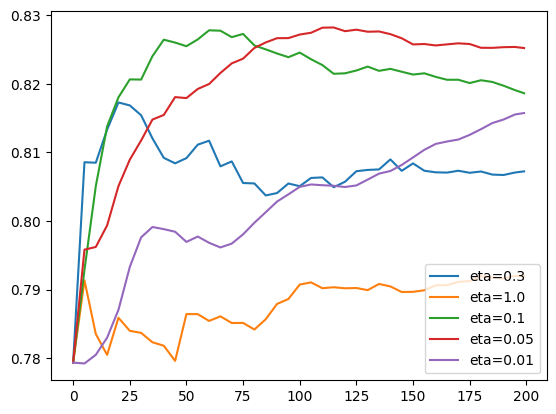

In [107]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Let’s concentrate on a few graphs for the initial analysis. We will plot three of them: ‘eta=1.0’, ‘eta=0.3’, and ‘eta=0.1’.

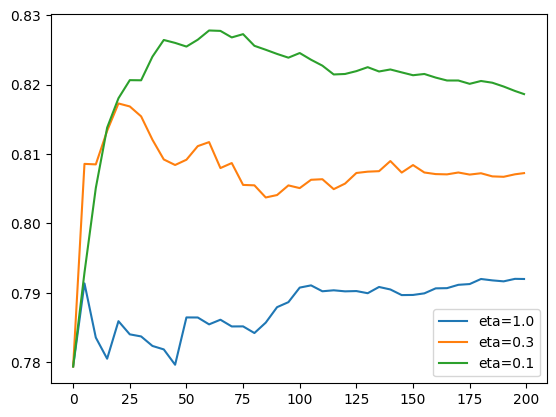

In [108]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

This plot provides a clearer view of the results. Notably, ‘eta=1.0’ exhibits the worst performance. It quickly reaches peak performance but then experiences a sharp decline, maintaining a consistently poor level. ‘eta=0.3’ performs reasonably well until around iteration 25, after which it steadily deteriorates. On the other hand, ‘eta=0.1’ demonstrates a slower growth rate, reaching its peak at a later stage before descending. This pattern is a direct reflection of the learning rate’s influence.

The learning rate controls both the speed at which the model learns and the size of the steps it takes during each iteration. If the steps are too large, the model learns rapidly but eventually starts to degrade due to the excessive step size, resulting in overfitting. Conversely, a smaller learning rate signifies slower but more stable learning. Such models tend to degrade more gradually, and their overfitting tendencies are less pronounced compared to models with higher learning rates.

Next let’s look at eta=0.3, eta=0.1, and eta=0.01

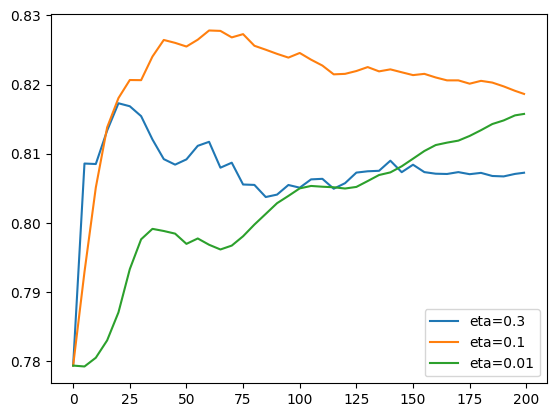

In [109]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

‘eta=0.01’ displays an extremely slow learning rate, making it challenging to estimate how long it might take to outperform the other model (represented by the green curve). This model’s progress is painstakingly slow, as the steps it takes are exceedingly tiny.

On the other hand, ‘eta=0.3’ takes a few significant steps initially but succumbs to overfitting more rapidly. In this plot, ‘eta=0.1’ seems to strike the ideal balance, particularly between 50 and 75 iterations. It may take a bit longer to reach its peak performance, but the resulting performance improvement justifies the wait.

There was also eta=0.05 let’s finally look also at this plot.

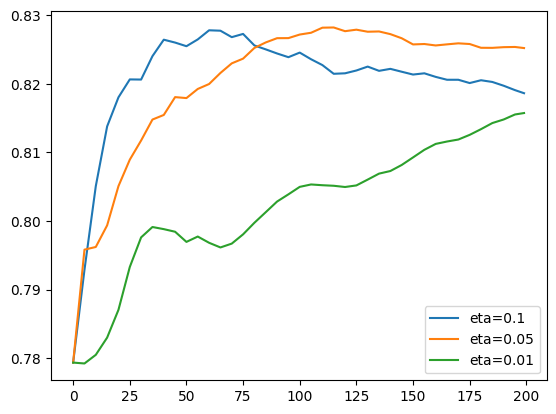

In [110]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

The ‘eta=0.05’ model requires approximately twice as many iterations to converge when compared to the blue model (‘eta=0.1’). Although it takes smaller steps and requires more time, the end result is still inferior to the blue model. Thus, it’s evident that the ‘eta=0.1’ model stands out as the best option, as it achieves better performance with fewer steps.

Now that we’ve found the best value for ‘eta,’ in the second part of XGBoost parameter tuning, we’ll focus on tuning two more parameters: ‘max_depth‘ and ‘min_child_weight‘ before proceeding to train the final model.

#### **Tuning max_depth**
**max_depth=6**

Now that we’ve set ‘eta‘ to 0.1, which we determined to be the best value, we’re going to focus on tuning the ‘max_depth‘ parameter. To do that, we’ll reset our scores dictionary to keep track of the new experiments. Initially, we’ll train a model with the same parameters as before, using it as a baseline for comparing different ‘max_depth‘ values.

In [111]:
scores = {}

In [112]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [113]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

Now, let’s set the ‘max_depth‘ value to 3.

In [114]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [115]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

**max_depth=4**

Let’s go through the process once more for ‘max_depth=4‘.

In [116]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [117]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

**max_depth=10**

Let’s repeat the process for ‘max_depth=10‘ once more.

In [118]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [119]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

**Plotting max_depth**

Now that we’ve collected data from four runs, let’s plot this information and determine which model performs the best.

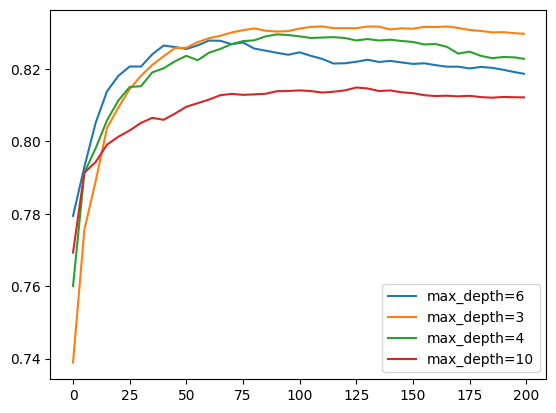

In [120]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()

We see the depth of 10 is worst. So actually we can delete it by
del scores['max_depth=10']

To get a better view on the y-area between 0.8 and 0.84 we can limit the plot as shown in the next snippet.

In [121]:
del scores['max_depth=10']

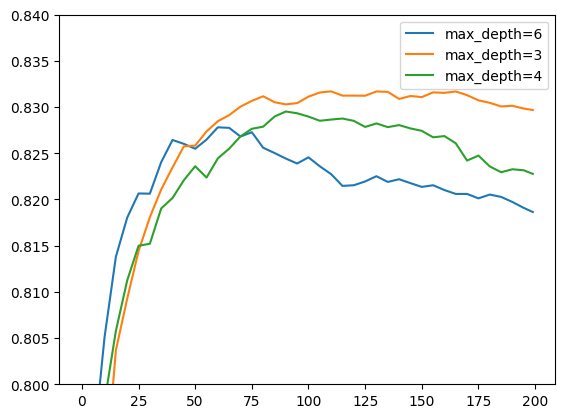

In [122]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
plt.ylim(0.8, 0.84)
plt.legend()

‘max_depth = 6‘ is the second worst. We conclude that ‘max_depth‘ of 3 is the best depth for us.

#### **Tuning min_child_weight**

**min_child_weight=1**

Now, we’ll set ‘eta‘ to 0.1 and ‘max_depth‘ to 3. We’re ready to start tuning the last parameter, which is ‘min_child_weight.’ To do this, we need to reset our scores dictionary once again to track the new experiments. Initially, we’ll train a model with the same parameters as before, but we’ll set ‘min_child_weight‘ to 1. This model will serve as our baseline for comparing different ‘min_child_weight‘ values.

In [123]:
scores = {}

In [124]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [125]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

**min_child_weight=10**

Now, let’s set the ‘min_child_weight‘ value to 10.

In [126]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [127]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

**min_child_weight=30**

Let’s go through the process once more for ‘min_child_weight=30‘.

In [128]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [129]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

##### **Plotting min_child_weight**

This should give us an idea if we actually need to increase this value or not. Now we can compare all runs of ‘min_child_weight=1‘, ‘min_child_weight=10‘, and ‘min_child_weight=30‘.

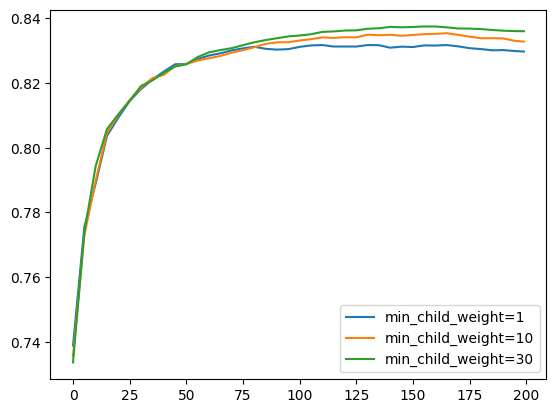

In [130]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.legend()

Here it’s not so easy to see which one is the best. We should also enlarge it a bit.

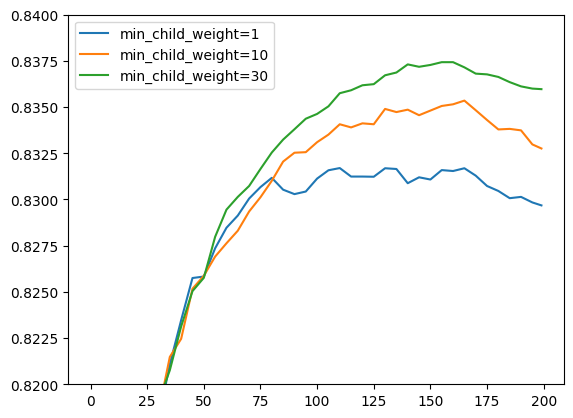

In [131]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.ylim(0.82, 0.84)
plt.legend()

This plot shows some differences compared to the video by Alexey. In this plot, a ‘min_child_weight‘ of 30 appears to be the best-performing value, whereas in the video, the choice is ‘min_child_weight‘ of 1. To maintain consistency with the video’s results, I’ve opted to select a ‘min_child_weight‘ of 1. It’s worth noting that parameter tuning can be influenced by various factors, and flexibility in choosing the optimal values is important.

#### **Train final model**

To train the final model, we need to determine the number of iterations for training. In the video, Alexey chose to train for 175 iterations.

In [132]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [133]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Always creating all these plots may not be necessary. You can also examine the raw output and use tools like pen and paper or an Excel spreadsheet when experimenting with parameter tuning. Finding the best approach depends on your preferences and needs. Eta, max_depth, and min_child_weight are indeed important parameters, but there are other valuable ones to consider.

For reference, you can explore the complete list of XGBoost parameters here: **XGBoost Parameters**.

Two parameters that can be particularly useful are ‘subsample‘ and ‘colsample_bytree.’ They have some similarities:

+ **‘colsample_bytree‘:**
Similar to what we observe in Random Forest, this parameter controls how many features each tree gets to see at each iteration. The maximum value is 1.0. You can experiment with values like 0.3 and 0.6, and then fine-tune around those values.
+ **‘subsample‘:**
Instead of sampling columns, this parameter allows you to sample rows. It means you can choose to provide only a percentage of the training data. For example, setting it to 0.5 means you randomly select 50% of the training data.

In addition to these, there’s a wealth of information available on rules of thumb for tuning XGBoost parameters. Kaggle is a valuable resource for learning more, and you can find many tutorials on XGBoost parameter tuning.

#### **Selecting the final model**

This is the final part of the module ‘Decision Trees and Ensemble Learning – Part 14.’ This time, we revisit the best model of each type and evaluate their performance on the validation data. Based on these evaluations, we will select the overall best model and train it on the full training dataset. The final model will then be evaluated on the test set.

Choosing between XGBoost, random forest and decision tree
Retrain the best model of each type.

Let’s retrain the best Decision Tree model we had.

In [134]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

Let’s retrain the best Random Forest model we had.

In [135]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Let’s retrain the best XGBoost model we had.

In [136]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Evaluate all the best of models on validation data

In [137]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7856948245380349)

In [138]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8246258264512848)

In [139]:
# XGBoost Model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8309347073212081)

We see that the XGBoost model has the best auc score. We’ll use this to train the final model.

#### **Training the final model**

To train the final model, we will use the entire dataset. Following the training, we will evaluate the final model on our test dataset.

In [140]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


Upon reviewing the previous output, we can observe that the index is not ordered. To address this, we will start by resetting the index.

In [141]:
df_full_train = df_full_train.reset_index(drop=True)

The next steps involve setting the ‘y’ value and removing the ‘status’ column from the training dataframe to prevent accidental use of this column during training.

In [142]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [143]:
del df_full_train['status']

We can create dictionaries for the DictVectorizer and then use the fit_transform method to obtain X_full_train. For X_test, we only need to call the transform method since the vectorizer has already been fitted.

In [144]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

Inspecting the ‘feature_names’ reveals the one-hot-encoded columns and confirms that there is no ‘status’ column, indicating that our data preparation is complete and we are ready to train the final model.

In [145]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

**XGBoost** models require data in the form of **DMatrix** for training. We also prepare the test data, which doesn’t require labels, as we’ll evaluate it using Scikit-Learn.

In [146]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

Now let’s set the parameters and train the final model.

In [147]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

#### **Evaluate the final model**

In [148]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

np.float64(0.8289367577342261)

The performance of the final model is a little bit worse than the best XGBoost model (0.831), but it’s only like a fraction of one percent. So this is fine. We can conclude that our model didn’t overfit. The final model generalizes quite well on unseen data. XGBoost models are often one of the best models at least for tabular data (dataframe with features). The downside of this is that XGBoost models are more complex, it’s more difficult to tune, it has more parameters, and it’s easier to overfit with XGBoost. But you can get a better performance out of this.